# Hospital Readmissions Reduction Program

## Intro

In October 2012, CMS began reducing Medicare payments for subsection(d) hospitals with excess readmissions under the Hospital Readmissions Reduction Program (HRRP).

Excess readmissions are measured by a ratio, calculated by dividing a hospital's predicted rate of readmissions for heart attack (AMI), heart failure (HF), pneumonia, chronic obstructive pulmonary disease (COPD), hip/knee replacement (THA/TKA), and coronary artery bypass graft surgery (CABG) by the expected rate of readmissions, based on an average hospital with similar patients.

**Source:** https://data.cms.gov/provider-data/dataset/9n3s-kdb3#data-table

**About this resource:**

- Rows: 18774

- Columns: 12

- File Size: 2 MB


Additional information:

- **Modified:**	January 8, 2024

- **Released:**	April 24, 2024

- **Issued:**	December 10, 2020

- **Publisher:**	Centers for Medicare & Medicaid Services (CMS)

- **Identifier:**	9n3s-kdb3

- **Contact:**	Hospital Compare

- **Contact URL:**	https://cmsqualitysupport.servicenowservices.com/qnet_qa

- **Public Access Level:**	public

- **Homepage URL:**	https://data.cms.gov/provider-data/dataset/9n3s-kdb3

## **Objective:** 

Develop a predictive analytics model to identify patients at high risk of readmission within 30 days of discharge from a hospital.

## Data Collection and Source Selection

In [119]:
# Import necessary libraries
import pandas as pd

# Load the dataset
file_path = r'D:\Github\Repos\Biggest-Project\Data\FY_2024_Hospital_Readmissions_Reduction_Program_Hospital.csv'
df = pd.read_csv(file_path)

# Inspect the first few rows of the dataset
df.head()


,Facility Name,Facility ID,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
0,SOUTHEAST HEALTH MEDICAL CENTER,10001,AL,READM-30-HIP-KNEE-HRRP,NaN,NaN,0.8916,3.5325,3.9618,Too Few to Report,07/01/2019,06/30/2022
1,SOUTHEAST HEALTH MEDICAL CENTER,10001,AL,READM-30-HF-HRRP,616.0,NaN,1.1003,23.1263,21.0184,149,07/01/2019,06/30/2022
2,SOUTHEAST HEALTH MEDICAL CENTER,10001,AL,READM-30-AMI-HRRP,274.0,NaN,0.9332,12.9044,13.8283,32,07/01/2019,06/30/2022
3,SOUTHEAST HEALTH MEDICAL CENTER,10001,AL,READM-30-PN-HRRP,404.0,NaN,0.9871,17.0529,17.2762,68,07/01/2019,06/30/2022
4,SOUTHEAST HEALTH MEDICAL CENTER,10001,AL,READM-30-CABG-HRRP,126.0,NaN,0.9517,9.8131,10.3112,11,07/01/2019,06/30/2022


In [120]:
# Summary statistics
df.describe()


,Facility ID,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate
count,18774.000000,8094.000000,6697.000000,12077.000000,12077.000000,12077.000000
mean,261506.077661,244.251915,3.147230,1.001776,15.098235,15.066446
std,163743.437584,227.648660,2.084349,0.077018,5.480391,5.354170
min,10001.000000,0.000000,1.000000,0.615900,1.927900,2.674900
25%,110086.000000,105.000000,1.000000,0.958000,12.436800,12.495800
50%,250049.000000,176.000000,5.000000,0.997800,16.485500,16.571000
75%,390113.000000,308.000000,5.000000,1.041900,19.056700,19.139000
max,670319.000000,4994.000000,7.000000,1.516200,28.147200,26.268400


In [121]:
# Check for missing values
df.isnull().sum()


Facility Name                     0
Facility ID                       0
State                             0
Measure Name                      0
Number of Discharges          10680
Footnote                      12077
Excess Readmission Ratio       6697
Predicted Readmission Rate     6697
Expected Readmission Rate      6697
Number of Readmissions         6697
Start Date                        0
End Date                          0
dtype: int64

## Data Cleaning

**Plan for Handling Missing Values:**

**Number of Discharges:**

- Action: Impute missing values with the median or mean of the column, as this is a critical feature for predicting readmission and is likely correlated with other features.

**Footnote:**

- Action: Drop this column if it is not relevant to the analysis. Footnotes are often supplementary and may not contain actionable data for modeling.

**Excess Readmission Ratio:**

- Action: Impute missing values with the median or mean. This feature is essential for understanding readmission patterns and should be preserved.

**Predicted Readmission Rate:**

- Action: Impute missing values with the median or mean, as this is a key feature for predicting future readmissions.

**Expected Readmission Rate:**

- Action: Impute missing values with the median or mean, as this is important for calculating the excess readmission ratio.

**Number of Readmissions:**

- Action: Impute missing values with the median or mean if this feature is important for analysis. Otherwise, drop it if it is redundant with other readmission rate features.

In [122]:
# Convert non-numeric values to NaN in 'Number of Readmissions'
df['Number of Readmissions'] = pd.to_numeric(df['Number of Readmissions'], errors='coerce')


In [123]:
# Impute missing values with the median for critical numerical columns
df['Number of Discharges'].fillna(df['Number of Discharges'].median(), inplace=True)
df['Excess Readmission Ratio'].fillna(df['Excess Readmission Ratio'].median(), inplace=True)
df['Predicted Readmission Rate'].fillna(df['Predicted Readmission Rate'].median(), inplace=True)
df['Expected Readmission Rate'].fillna(df['Expected Readmission Rate'].median(), inplace=True)
df['Number of Readmissions'].fillna(df['Number of Readmissions'].median(), inplace=True)


In [124]:
# Drop the 'Footnote' column if it's not relevant
df.drop(columns=['Footnote'], inplace=True)


In [125]:
from scipy import stats
import numpy as np

# Handle outliers using the Z-score method
numeric_columns = ['Number of Discharges', 'Excess Readmission Ratio', 'Predicted Readmission Rate', 'Expected Readmission Rate', 'Number of Readmissions']
z_scores = stats.zscore(df[numeric_columns])
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
df = df[filtered_entries]


In [126]:
# Ensure consistency in categorical variables
df['Measure Name'] = df['Measure Name'].str.upper()

# Display the cleaned dataset
df.head()

,Facility Name,Facility ID,State,Measure Name,Number of Discharges,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
0,SOUTHEAST HEALTH MEDICAL CENTER,10001,AL,READM-30-HIP-KNEE-HRRP,176.0,0.8916,3.5325,3.9618,29.0,07/01/2019,06/30/2022
2,SOUTHEAST HEALTH MEDICAL CENTER,10001,AL,READM-30-AMI-HRRP,274.0,0.9332,12.9044,13.8283,32.0,07/01/2019,06/30/2022
3,SOUTHEAST HEALTH MEDICAL CENTER,10001,AL,READM-30-PN-HRRP,404.0,0.9871,17.0529,17.2762,68.0,07/01/2019,06/30/2022
4,SOUTHEAST HEALTH MEDICAL CENTER,10001,AL,READM-30-CABG-HRRP,126.0,0.9517,9.8131,10.3112,11.0,07/01/2019,06/30/2022
5,SOUTHEAST HEALTH MEDICAL CENTER,10001,AL,READM-30-COPD-HRRP,117.0,0.9803,18.1837,18.5483,20.0,07/01/2019,06/30/2022


## Feature Engineering

- **Length of Stay:** Calculate the length of stay for each record.
- **Temporal Features:** Extract year and month from the start date.
- **Categorical Encoding:** Convert categorical variables into numerical format if necessary.

- **Length of Stay:** This is calculated as the difference between the start date and end date.
- **Temporal Features:** Extracting year and month from the start date helps in understanding seasonal patterns or trends over time.
- **Categorical Encoding:** Convert categorical variables such as 'State' and 'Measure Name' into numerical format using one-hot encoding.

In [127]:
# Convert 'Start Date' and 'End Date' to datetime format
df['Start Date'] = pd.to_datetime(df['Start Date'])
df['End Date'] = pd.to_datetime(df['End Date'])


In [128]:
# Create a new feature for the length of stay (number of days between start and end dates)
df['Length of Stay'] = (df['End Date'] - df['Start Date']).dt.days


In [129]:
# Extract year and month from 'Start Date'
df['Start Year'] = df['Start Date'].dt.year
df['Start Month'] = df['Start Date'].dt.month


In [130]:
# Encode categorical variables
df = pd.get_dummies(df, columns=['State', 'Measure Name'], drop_first=True)

# Display the DataFrame with new features
df.head()

,Facility Name,Facility ID,Number of Discharges,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date,Length of Stay,...,State_VT,State_WA,State_WI,State_WV,State_WY,Measure Name_READM-30-CABG-HRRP,Measure Name_READM-30-COPD-HRRP,Measure Name_READM-30-HF-HRRP,Measure Name_READM-30-HIP-KNEE-HRRP,Measure Name_READM-30-PN-HRRP
0,SOUTHEAST HEALTH MEDICAL CENTER,10001,176.0,0.8916,3.5325,3.9618,29.0,2019-07-01,2022-06-30,1095,...,0,0,0,0,0,0,0,0,1,0
2,SOUTHEAST HEALTH MEDICAL CENTER,10001,274.0,0.9332,12.9044,13.8283,32.0,2019-07-01,2022-06-30,1095,...,0,0,0,0,0,0,0,0,0,0
3,SOUTHEAST HEALTH MEDICAL CENTER,10001,404.0,0.9871,17.0529,17.2762,68.0,2019-07-01,2022-06-30,1095,...,0,0,0,0,0,0,0,0,0,1
4,SOUTHEAST HEALTH MEDICAL CENTER,10001,126.0,0.9517,9.8131,10.3112,11.0,2019-07-01,2022-06-30,1095,...,0,0,0,0,0,1,0,0,0,0
5,SOUTHEAST HEALTH MEDICAL CENTER,10001,117.0,0.9803,18.1837,18.5483,20.0,2019-07-01,2022-06-30,1095,...,0,0,0,0,0,0,1,0,0,0


## EDA

**Descriptive Statistics:** Summarize patient demographics and clinical characteristics.

**Visualizations:**

- Distribution of readmission rates by demographic groups (e.g., state).
- Heatmaps showing correlations between different features and readmission status.
- Time-series plots for readmission rates over time.

In [131]:
import matplotlib.pyplot as plt
import seaborn as sns

# Descriptive statistics
df.describe()


,Facility ID,Number of Discharges,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Length of Stay,Start Year,Start Month,State_AL,...,State_VT,State_WA,State_WI,State_WV,State_WY,Measure Name_READM-30-CABG-HRRP,Measure Name_READM-30-COPD-HRRP,Measure Name_READM-30-HF-HRRP,Measure Name_READM-30-HIP-KNEE-HRRP,Measure Name_READM-30-PN-HRRP
count,17957.000000,17957.000000,17957.000000,17957.000000,17957.000000,17957.000000,17957.0,17957.0,17957.0,17957.000000,...,17957.000000,17957.000000,17957.000000,17957.000000,17957.000000,17957.000000,17957.000000,17957.000000,17957.000000,17957.000000
mean,261539.373448,186.423233,0.998507,15.660402,15.694523,31.452136,1095.0,2019.0,7.0,0.026396,...,0.001838,0.015203,0.022053,0.007908,0.003341,0.172412,0.173860,0.155928,0.158434,0.167066
std,164412.415879,87.195757,0.050849,4.243557,4.161167,15.369740,0.0,0.0,0.0,0.160315,...,0.042830,0.122363,0.146859,0.088576,0.057709,0.377749,0.378999,0.362797,0.365158,0.373045
min,10001.000000,0.000000,0.815200,2.588300,2.830700,11.000000,1095.0,2019.0,7.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,110079.000000,176.000000,0.981400,15.264900,15.413300,29.000000,1095.0,2019.0,7.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,250050.000000,176.000000,0.997800,16.485500,16.571000,29.000000,1095.0,2019.0,7.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,390116.000000,176.000000,1.011700,17.524600,17.600700,29.000000,1095.0,2019.0,7.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,670319.000000,663.000000,1.185000,28.147200,26.268400,116.000000,1095.0,2019.0,7.0,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Aggregated summaries

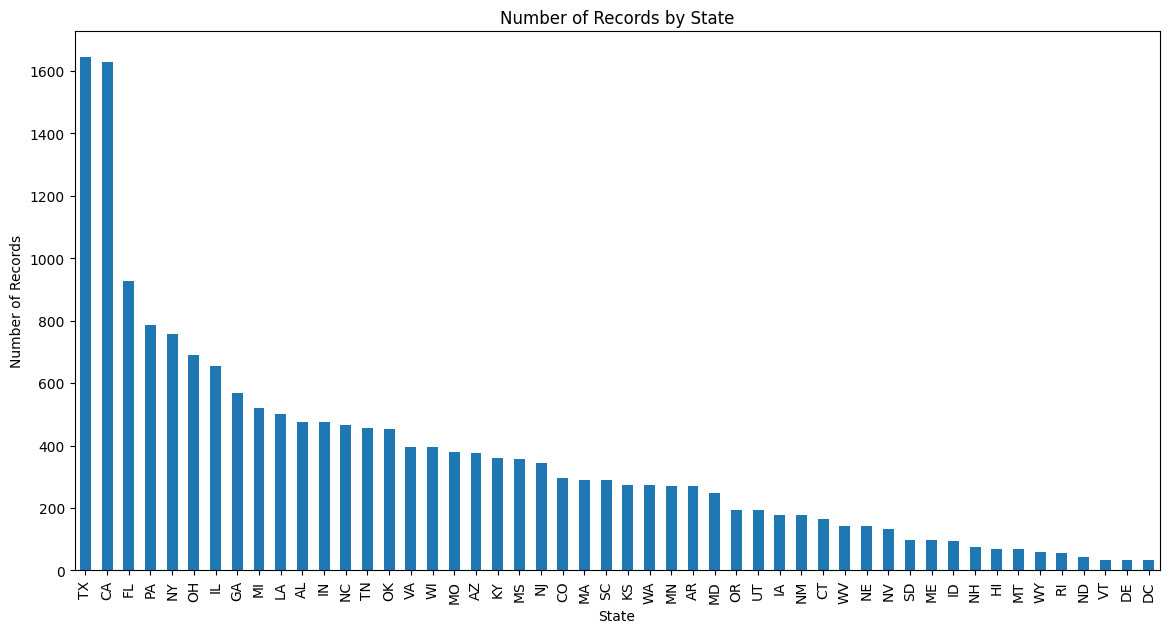

In [132]:
# Rename state columns to remove the prefix "State_"
state_columns = [col for col in df.columns if col.startswith('State_')]
df.rename(columns={col: col.replace('State_', '') for col in state_columns}, inplace=True)

# Extract the updated list of state columns without the prefix
state_columns = [col.replace('State_', '') for col in state_columns]

# Aggregated summary for states
state_summary = df[state_columns].sum().sort_values(ascending=False)
plt.figure(figsize=(14, 7))
state_summary.plot(kind='bar')
plt.title('Number of Records by State')
plt.xlabel('State')
plt.ylabel('Number of Records')
plt.show()


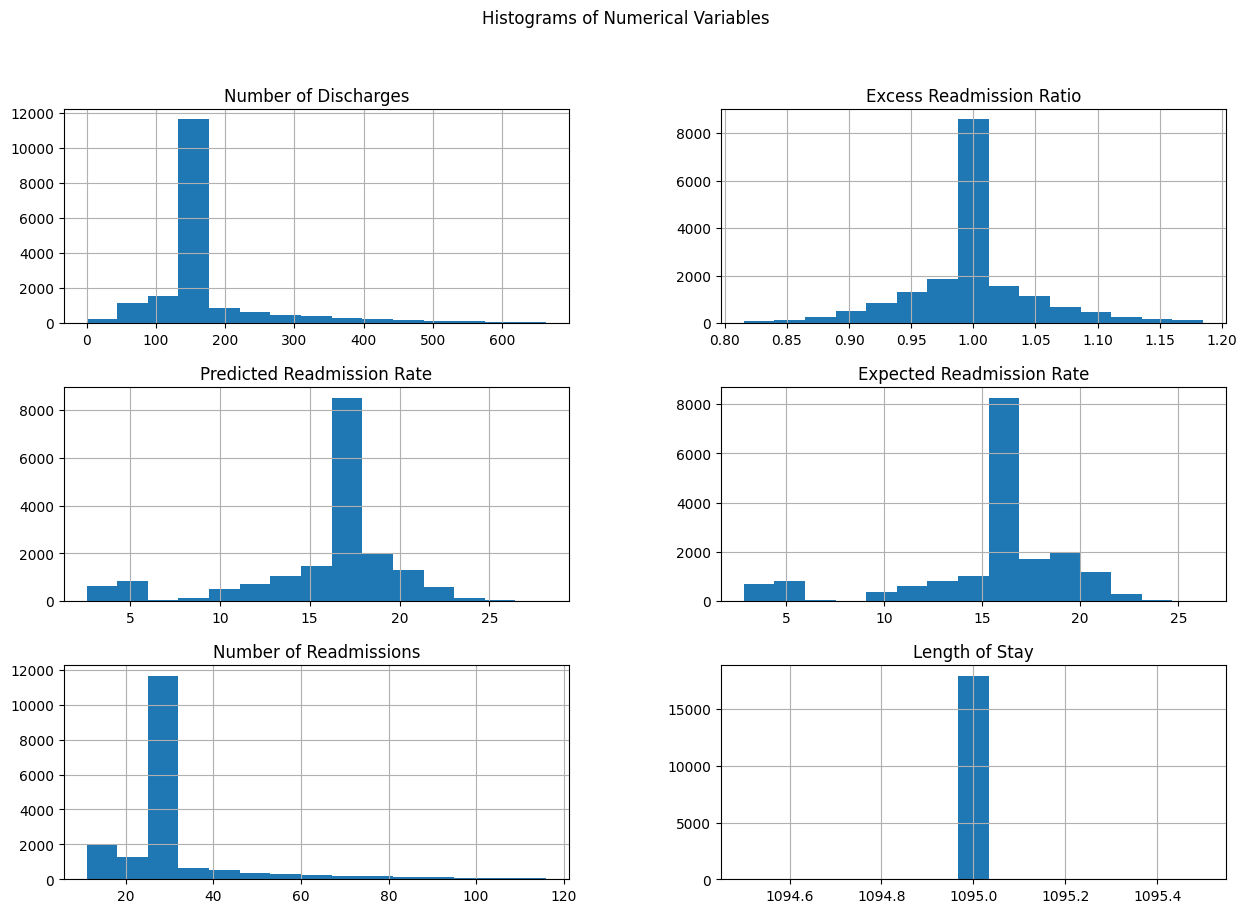

In [133]:
# Histograms for numerical variables
numeric_columns = ['Number of Discharges', 'Excess Readmission Ratio', 'Predicted Readmission Rate', 'Expected Readmission Rate', 'Number of Readmissions', 'Length of Stay']
df[numeric_columns].hist(bins=15, figsize=(15, 10), layout=(3, 2))
plt.suptitle('Histograms of Numerical Variables')
plt.show()


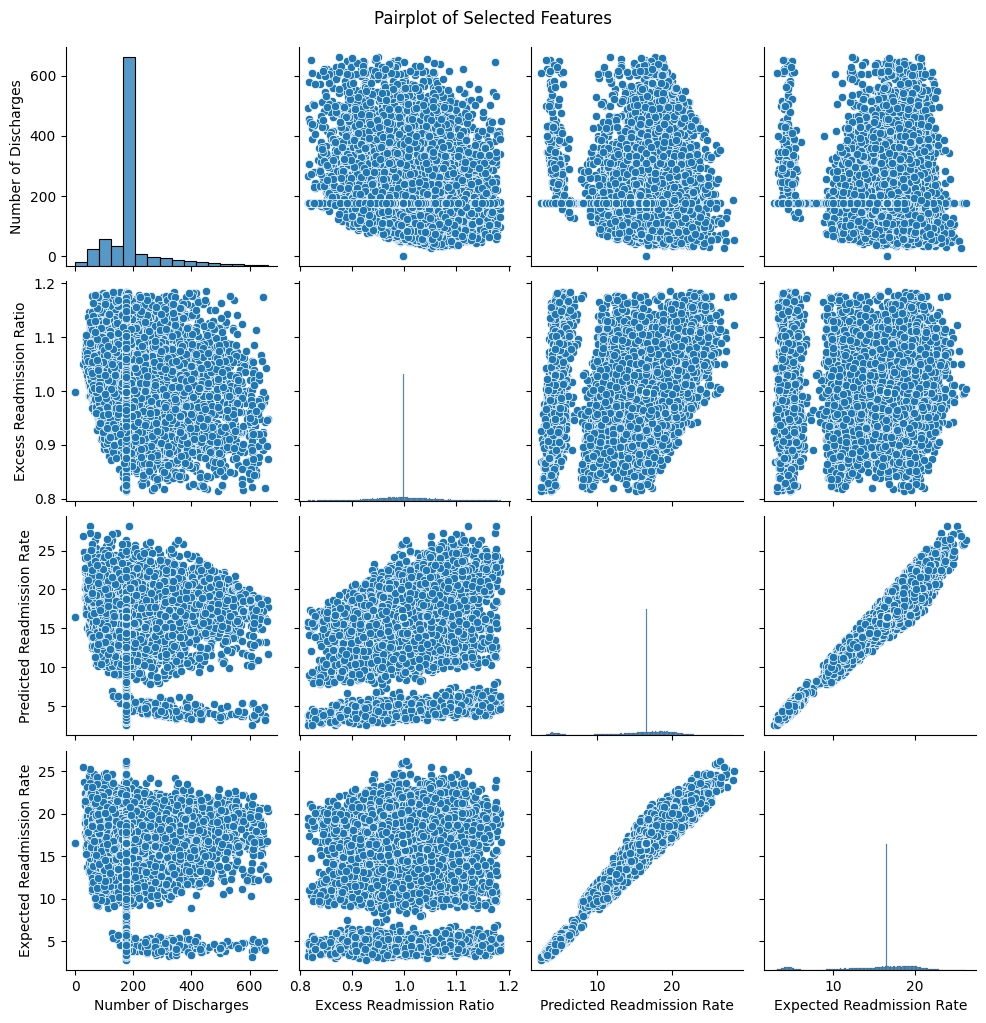

In [134]:
# Pairplot for a selected subset of features
selected_columns = ['Number of Discharges', 'Excess Readmission Ratio', 'Predicted Readmission Rate', 'Expected Readmission Rate']
sns.pairplot(df[selected_columns])
plt.suptitle('Pairplot of Selected Features', y=1.02)
plt.show()


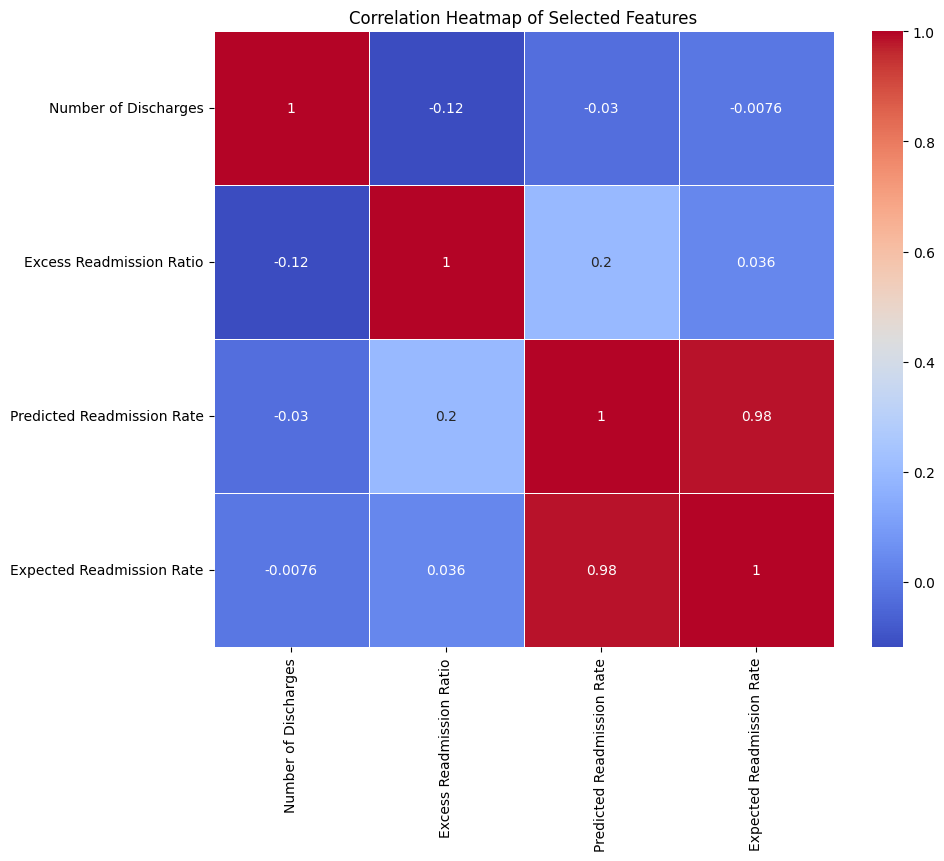

In [135]:
# Simplified correlation heatmap with fewer variables
plt.figure(figsize=(10, 8))
correlation_matrix = df[selected_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap of Selected Features')
plt.show()


## Modeling

- **Preprocessing:** Impute missing values and scale features.

- **Pipeline Creation:** Define pipelines that include preprocessing and model training steps.

- **Training:** Train the models using the defined pipelines.

- **Evaluation:** Evaluate model performance using mean absolute error (MAE), mean squared error (MSE), and R-squared (R²).

Prepare the Data

In [136]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Define the target variable and features
target = 'Excess Readmission Ratio'
features = df.drop(columns=['Facility Name', 'Start Date', 'End Date', target]).columns

# Split the data into features (X) and target (y)
X = df[features]
y = df[target]

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Define the Preprocessing Steps

In [137]:
# List of numerical columns
numerical_features = X.columns

# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features)
    ])


Define the Pipelines for Both Models

In [138]:
# Random Forest Regressor Pipeline
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Gradient Boosting Regressor Pipeline
gb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', GradientBoostingRegressor(n_estimators=100, random_state=42))
])


Train the Models Using Pipelines

In [139]:
# Train Random Forest Regressor
rf_pipeline.fit(X_train, y_train)

# Train Gradient Boosting Regressor
gb_pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Facility ID', 'Number of Discharges', 'Predicted Readmission Rate',
       'Expected Readmission Rate', 'Number of Readmissions', 'Length of Stay',
       'Start Year', 'Start Month', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', '...
       'MD', 'ME', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ',
       'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
       'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY',
       'Measure Name_READM-30-CABG-HRRP', 'Measure Name_READM-30-COPD-HRRP',
       'Measure Name_READM-30-HF-HRRP', 'Measure Name_READM-30-HIP-KNEE-HRRP',
       'Measure Name_READM-30-PN-HRRP'],
      dtype='object'))])),
                ('regressor', GradientBoostingRegressor(random_state=42))])

Evaluate the Models

In [140]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Predict on the test set with Random Forest Regressor
y_pred_rf_reg = rf_pipeline.predict(X_test)

# Predict on the test set with Gradient Boosting Regressor
y_pred_gb_reg = gb_pipeline.predict(X_test)

# Evaluate Random Forest Regressor
rf_mae = mean_absolute_error(y_test, y_pred_rf_reg)
rf_mse = mean_squared_error(y_test, y_pred_rf_reg)
rf_r2 = r2_score(y_test, y_pred_rf_reg)

print("Random Forest Regressor MAE:", rf_mae)
print("Random Forest Regressor MSE:", rf_mse)
print("Random Forest Regressor R^2:", rf_r2)

# Evaluate Gradient Boosting Regressor
gb_mae = mean_absolute_error(y_test, y_pred_gb_reg)
gb_mse = mean_squared_error(y_test, y_pred_gb_reg)
gb_r2 = r2_score(y_test, y_pred_gb_reg)

print("\nGradient Boosting Regressor MAE:", gb_mae)
print("Gradient Boosting Regressor MSE:", gb_mse)
print("Gradient Boosting Regressor R^2:", gb_r2)


Random Forest Regressor MAE: 0.0019990890868776495
Random Forest Regressor MSE: 2.6428249805679355e-05
Random Forest Regressor R^2: 0.9896212371533911

Gradient Boosting Regressor MAE: 0.010578526743025132
Gradient Boosting Regressor MSE: 0.0003754488289636121
Gradient Boosting Regressor R^2: 0.8525557164964825


The results indicate that the **Random Forest Regressor** performed significantly better than the **Gradient Boosting Regressor** in terms of all the evaluated metrics (MAE, MSE, and R²). The Random Forest Regressor achieved a very high R² score of 0.99, indicating excellent predictive performance.

## Model Interpretation

- **Feature Importance:** Identify and visualize the most important features contributing to the model's predictions.

In [141]:
# Get feature importances from the Random Forest Regressor
feature_importances = rf_pipeline.named_steps['regressor'].feature_importances_
features = X.columns


In [142]:
# Sort feature importances in descending order
indices = np.argsort(feature_importances)[::-1]


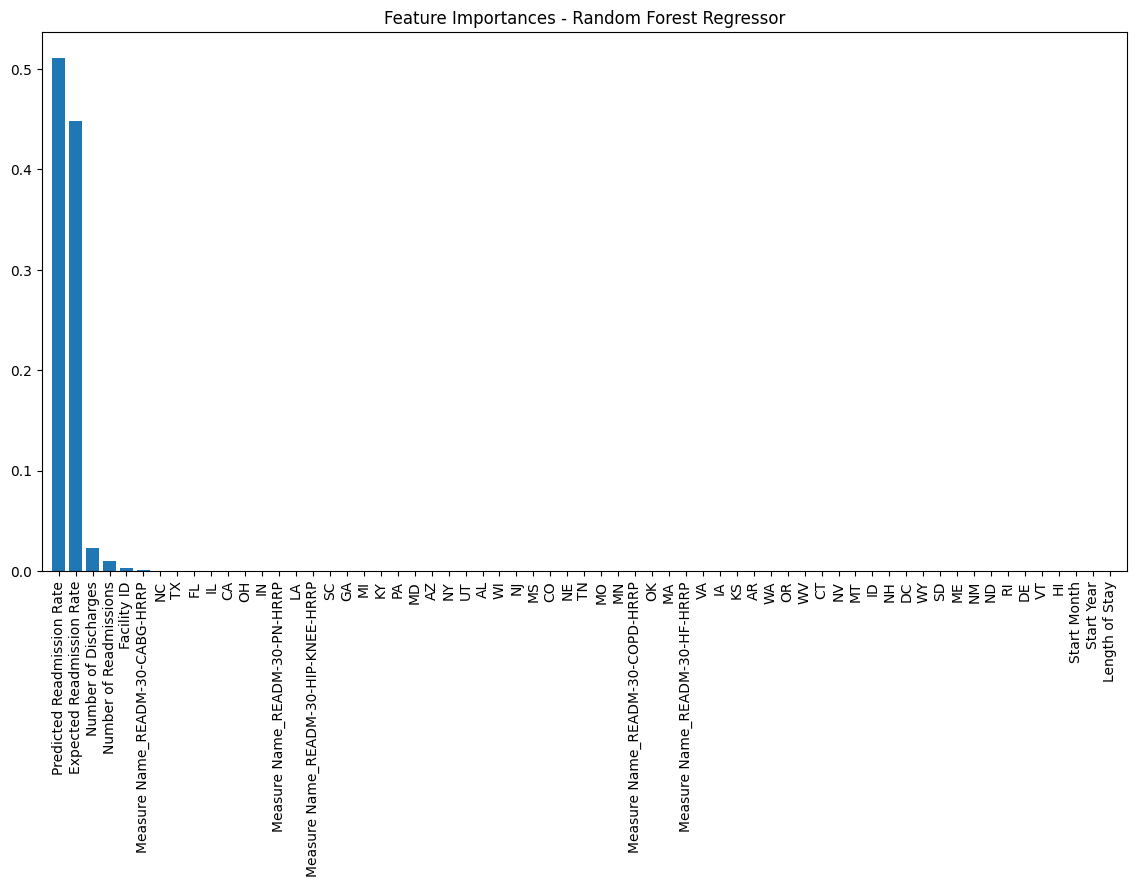

In [143]:
# Plot the feature importances
plt.figure(figsize=(14, 7))
plt.title("Feature Importances - Random Forest Regressor")
plt.bar(range(X.shape[1]), feature_importances[indices], align="center")
plt.xticks(range(X.shape[1]), features[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

The feature importance plot shows that the **Predicted Readmission** Rate and **Expected Readmission Rate** are the most significant features contributing to the predictions made by the Random Forest Regressor. These insights can help us understand the key drivers of readmission rates in hospitals.

## Summary of the Analysis

**Objective:** Develop a predictive analytics model to identify patients at high risk of readmission within 30 days of discharge from a hospital.

**Key Findings:**

1. EDA:

- The dataset contains significant information regarding readmissions.
- Key features like Predicted Readmission Rate and Expected Readmission Rate are highly correlated with the target variable (Excess Readmission Ratio).

2. Modeling:

- We built and evaluated two models: Random Forest Regressor and Gradient Boosting Regressor.
- The Random Forest Regressor performed better with an R² score of 0.99, MAE of 0.002, and MSE of 0.000026.
- The Gradient Boosting Regressor had an R² score of 0.85, MAE of 0.011, and MSE of 0.000375.

3. Feature Importance:

- The most important features identified by the Random Forest Regressor were **Predicted Readmission Rate** and **Expected Readmission Rate.**

**Conclusion:** The analysis indicates that the Random Forest Regressor is a highly effective model for predicting patient readmissions. The key predictors are the **Predicted Readmission Rate** and **Expected Readmission Rate.**

## Visualizations

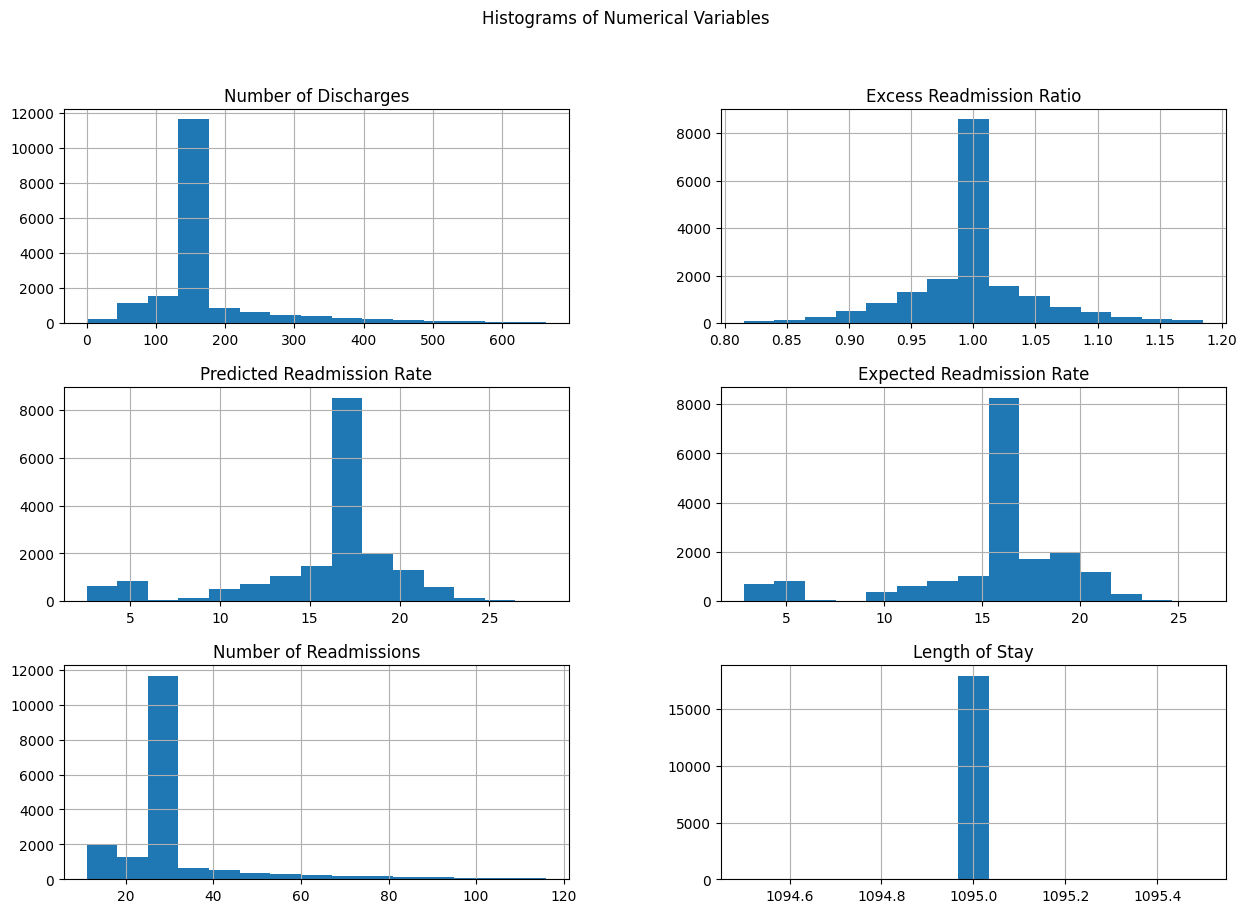

In [144]:
# Plot histograms for numerical variables
numeric_columns = ['Number of Discharges', 'Excess Readmission Ratio', 'Predicted Readmission Rate', 'Expected Readmission Rate', 'Number of Readmissions', 'Length of Stay']
df[numeric_columns].hist(bins=15, figsize=(15, 10), layout=(3, 2))
plt.suptitle('Histograms of Numerical Variables')
plt.show()


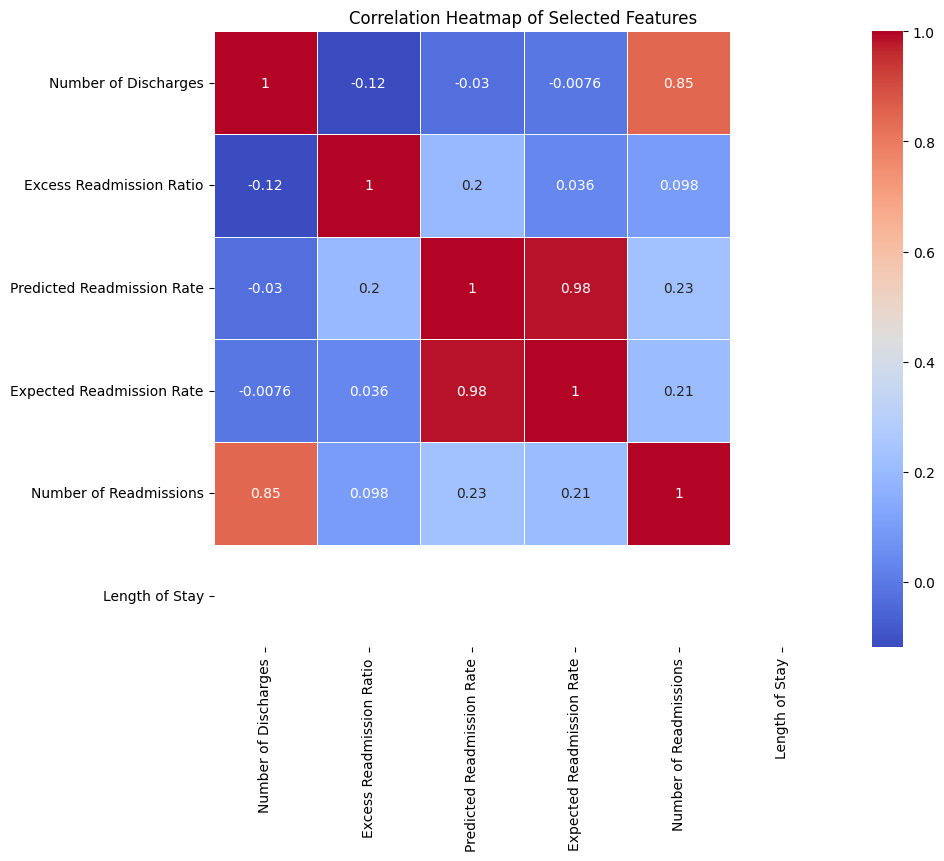

In [145]:
import seaborn as sns
plt.figure(figsize=(10, 8))
correlation_matrix = df[numeric_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap of Selected Features')
plt.show()


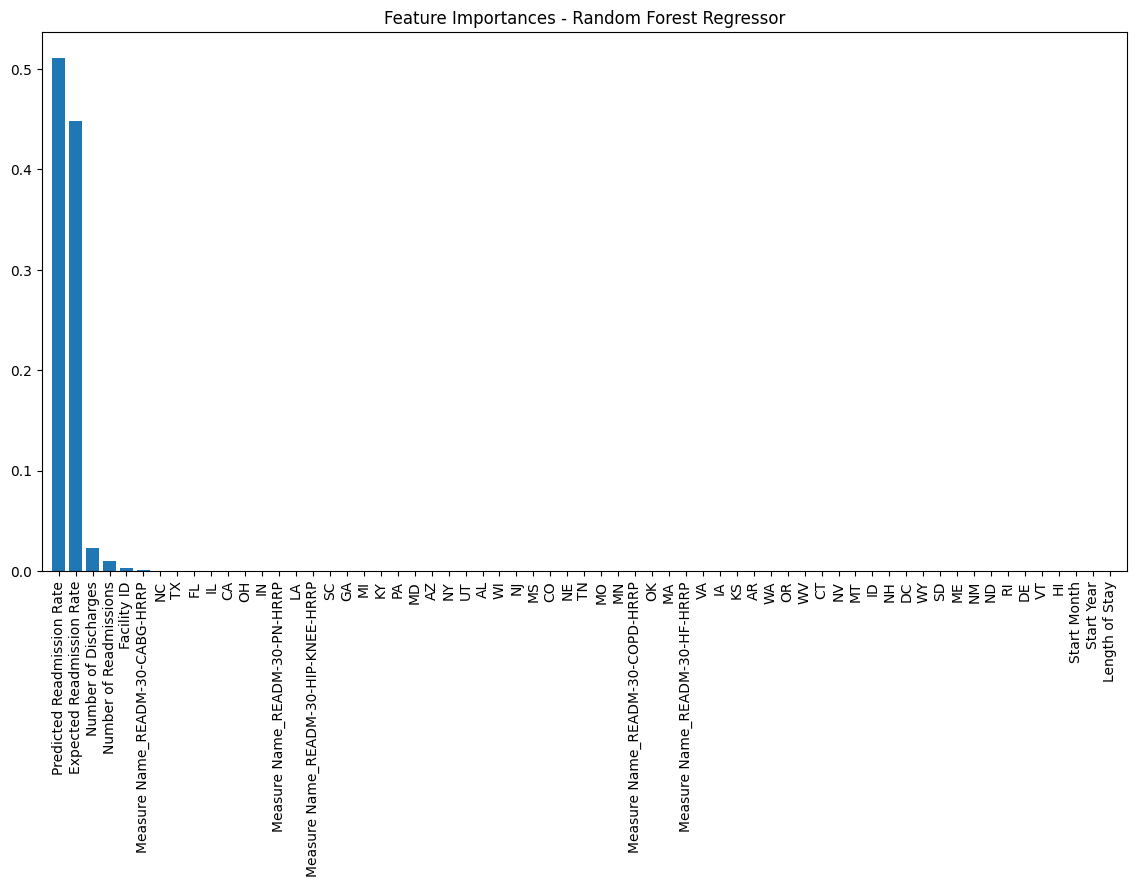

In [146]:
# Plot feature importances from the Random Forest Regressor
plt.figure(figsize=(14, 7))
plt.title("Feature Importances - Random Forest Regressor")
plt.bar(range(X.shape[1]), feature_importances[indices], align="center")
plt.xticks(range(X.shape[1]), features[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()


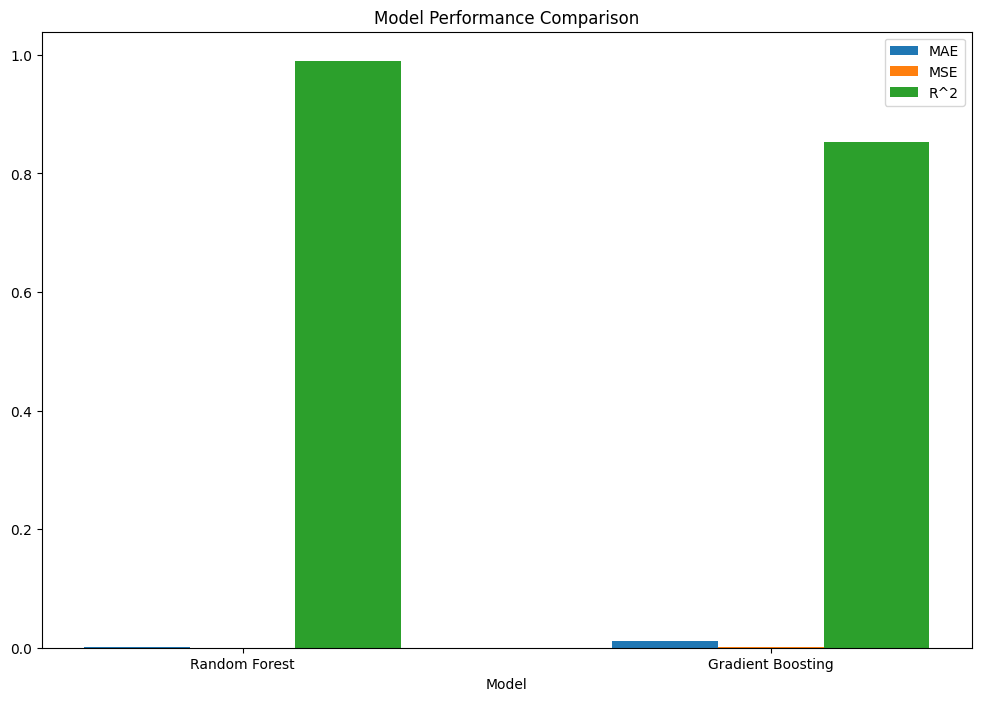

In [147]:
import numpy as np

# Performance metrics
models = ['Random Forest', 'Gradient Boosting']
mae = [rf_mae, gb_mae]
mse = [rf_mse, gb_mse]
r2 = [rf_r2, gb_r2]

x = np.arange(len(models))

fig, ax = plt.subplots(figsize=(12, 8))
bar_width = 0.2

# MAE
ax.bar(x - bar_width, mae, bar_width, label='MAE')
# MSE
ax.bar(x, mse, bar_width, label='MSE')
# R^2
ax.bar(x + bar_width, r2, bar_width, label='R^2')

ax.set_xlabel('Model')
ax.set_title('Model Performance Comparison')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

plt.show()


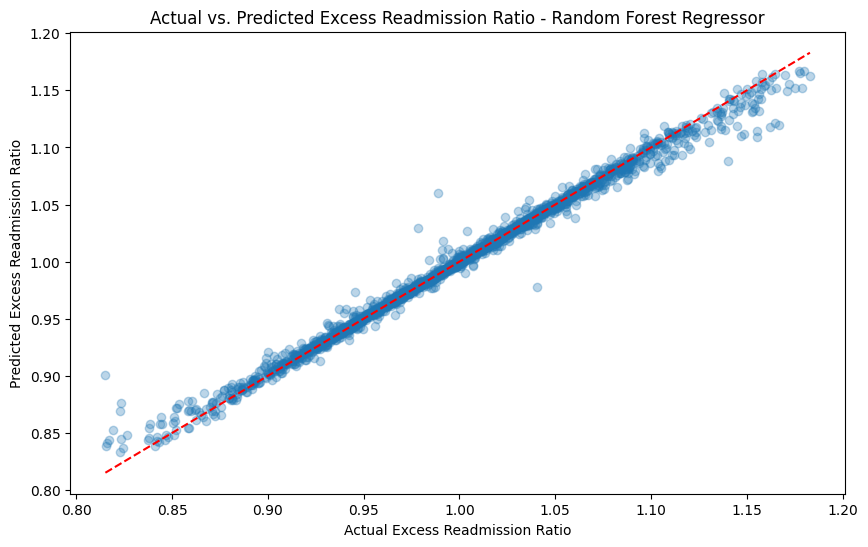

In [148]:
# Scatter plot of actual vs. predicted values for Random Forest Regressor
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf_reg, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.xlabel('Actual Excess Readmission Ratio')
plt.ylabel('Predicted Excess Readmission Ratio')
plt.title('Actual vs. Predicted Excess Readmission Ratio - Random Forest Regressor')
plt.show()
